In [13]:
import matplotlib.pyplot as plt
from math import *
import random

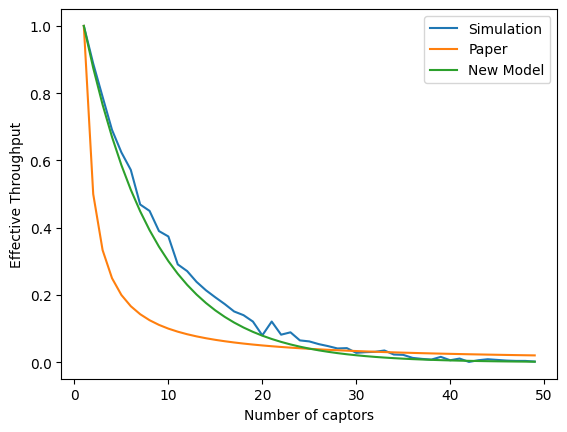

In [25]:
N_SAMPLES = 1000
X_MAX     = 50
CW        = 8

def is_free(transmitted, backoff, i):
    slot = backoff[i]
    for j in range(len(backoff)):
        if i != j and (not transmitted[j]) and backoff[j] == slot:
            return False
    return True

def simul(N, CW=8):
    """
    Simulate all sensors sending one packet at the same time with given contention window size.
    Returns 1 if the packet is successfully sent, 0 otherwise.
    """

    t = 0 # number of transmissions required
    transmitted = [False for _3 in range(N)]

    # affect one time slot to every sensor independently
    backoff = [random.randint(0, CW) for _2 in range(N)]

    # mark successfull packets as transmitted
    for i in range(N):
        if not transmitted[i] and is_free(transmitted, backoff, i):
            transmitted[i] = True
    
    return int(transmitted[0])

def simul_average(N, CW=8):
    l = [simul(N, CW) for _1 in range(N_SAMPLES)]
    return sum(l) / len(l)

X  = list(range(1, X_MAX))
Y1 = [simul_average(x, CW) for x in X] # takes a little bit of time

X2 = list(range(1, X_MAX))
Y2 = [1 / x for x in X2]
Y3 = [pow(1 - 1 / CW, x - 1) for x in X2]

plt.plot(X, Y1, label='Simulation')
plt.plot(X2, Y2, label='Paper')
plt.plot(X2, Y3, label='New Model')
plt.xlabel('Number of captors')
plt.ylabel('Effective Throughput')
plt.legend()
plt.show()